In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

import pandas as pd
import numpy as np
from sklearn.linear_model import TweedieRegressor

import pystarboard.data as filecoin_data
import pystarboard.data_spacescope as data_spacescope

import os
import gas_data

In [23]:
save_dir = os.path.join(os.environ['HOME'], 'Documents', 'direct_filp_v2')
offline_dir = os.path.join(save_dir, 'offline')
os.makedirs(save_dir, exist_ok=True)
os.makedirs(offline_dir, exist_ok=True)

In [3]:
training_start_date = date(2022, 12, 1)
# training_end_date = date.today()-timedelta(days=3)
training_end_date = date(2023, 10, 20)
gas_train_psd_df = gas_data.get_daily_gasusage_training_data(training_start_date, training_end_date).dropna()

In [4]:
gas_train_psd_df['stat_date'] = pd.to_datetime(gas_train_psd_df['stat_date'])

In [5]:
gas_train_psd_df.head()

,stat_date,total_gas_used,provecommit_sector_gas_used,precommit_sector_gas_used,provecommit_aggregate_gas_used,precommit_sector_batch_gas_used,publish_storage_deals_gas_used,submit_windowed_post_gas_used,date,day_onboarded_rb_power_pib,...,total_qa_power_eib,rb_renewal_rate,day_renewed_qa_power_pib,day_renewed_rb_power_pib,fpr,day_onboarded_deal_power,network_qa_rb_ratio,precommitx_sector_gas_used,provecommitx_sector_gas_used,total_minus_directfilp
0,2022-12-01 00:00:00+00:00,47669602126167,6946921288931,5473800854866,4173581349773,1218855229834,13390461427535,11093536613536,2022-12-01,4.900513,...,18.637933,0.622071,32.129242,32.129242,0.826182,23.292858,1.219122,6692656084700,11120502638704,16465981975228
1,2022-12-02 00:00:00+00:00,45607885065483,9307313574487,5489882794848,1976727065402,877822198281,11838746143109,10828102503580,2022-12-02,5.463226,...,18.786623,0.671110,32.095942,32.094513,0.784087,19.839726,1.220607,6367704993129,11284040639889,16117393289356
2,2022-12-03 00:00:00+00:00,44431816043360,11293222469159,8832805859531,13333315382,119246934388,11203538398130,8766646324191,2022-12-03,5.796570,...,18.916621,0.688499,34.813684,34.813599,0.742567,16.720239,1.220888,8952052793919,11306555784541,12969669066770
3,2022-12-04 00:00:00+00:00,41150077997254,11346935334084,9689904658983,2116221197,74609249,10762030982806,7149476871990,2022-12-04,5.967133,...,18.957937,0.702883,43.277560,43.273499,0.744504,17.387956,1.222423,9689979268232,11349051555281,9349016190935
4,2022-12-05 00:00:00+00:00,42849385237355,10859472903098,9986979799607,0,0,10074386059308,6842666672362,2022-12-05,5.757080,...,18.974549,0.665862,36.031763,36.031616,0.735682,16.023787,1.223778,9986979799607,10859472903098,11928546475342


In [6]:
token = '/Users/kiran/code/filecoin-mecha-twin/kiran_spacescope_auth.json'
sso = data_spacescope.SpacescopeDataConnection(token)
network_fee_breakdown_df = sso.spacescope_query(training_start_date, training_end_date, 
                     'https://api.spacescope.io/v2/gas/daily_network_fee_breakdown?end_date=%s&start_date=%s')

In [7]:
network_fee_breakdown_df['stat_date'] = pd.to_datetime(network_fee_breakdown_df['stat_date'])

In [8]:
network_fee_breakdown_df['base_fee_burn'].describe()

count      324.000000
mean      9329.898542
std       9924.335639
min          0.002139
25%        271.497095
50%       5941.188158
75%      16574.350289
max      37637.227992
Name: base_fee_burn, dtype: float64

In [9]:
gas_train_psd_df.head()

,stat_date,total_gas_used,provecommit_sector_gas_used,precommit_sector_gas_used,provecommit_aggregate_gas_used,precommit_sector_batch_gas_used,publish_storage_deals_gas_used,submit_windowed_post_gas_used,date,day_onboarded_rb_power_pib,...,total_qa_power_eib,rb_renewal_rate,day_renewed_qa_power_pib,day_renewed_rb_power_pib,fpr,day_onboarded_deal_power,network_qa_rb_ratio,precommitx_sector_gas_used,provecommitx_sector_gas_used,total_minus_directfilp
0,2022-12-01 00:00:00+00:00,47669602126167,6946921288931,5473800854866,4173581349773,1218855229834,13390461427535,11093536613536,2022-12-01,4.900513,...,18.637933,0.622071,32.129242,32.129242,0.826182,23.292858,1.219122,6692656084700,11120502638704,16465981975228
1,2022-12-02 00:00:00+00:00,45607885065483,9307313574487,5489882794848,1976727065402,877822198281,11838746143109,10828102503580,2022-12-02,5.463226,...,18.786623,0.671110,32.095942,32.094513,0.784087,19.839726,1.220607,6367704993129,11284040639889,16117393289356
2,2022-12-03 00:00:00+00:00,44431816043360,11293222469159,8832805859531,13333315382,119246934388,11203538398130,8766646324191,2022-12-03,5.796570,...,18.916621,0.688499,34.813684,34.813599,0.742567,16.720239,1.220888,8952052793919,11306555784541,12969669066770
3,2022-12-04 00:00:00+00:00,41150077997254,11346935334084,9689904658983,2116221197,74609249,10762030982806,7149476871990,2022-12-04,5.967133,...,18.957937,0.702883,43.277560,43.273499,0.744504,17.387956,1.222423,9689979268232,11349051555281,9349016190935
4,2022-12-05 00:00:00+00:00,42849385237355,10859472903098,9986979799607,0,0,10074386059308,6842666672362,2022-12-05,5.757080,...,18.974549,0.665862,36.031763,36.031616,0.735682,16.023787,1.223778,9986979799607,10859472903098,11928546475342


In [10]:
network_fee_breakdown_df.head()

,stat_date,base_fee_burn,overestimation_burn,precommit_batch_fee_burn,provecommit_batch_fee_burn,penalty_fee_burn,miner_tip
0,2022-12-01 00:00:00+00:00,7538.720222,426.543282,245.427588,361.849474,19846.158908,3882.477596
1,2022-12-02 00:00:00+00:00,2971.449729,184.320454,211.147674,178.293351,14688.700771,5594.564169
2,2022-12-03 00:00:00+00:00,22.256246,2.470737,43.166234,1.158549,4689.531451,1389.067429
3,2022-12-04 00:00:00+00:00,0.005029,0.000292,0.008217,0.172550,4774.413295,105.536527
4,2022-12-05 00:00:00+00:00,0.006210,0.000344,0.000000,0.000000,6296.186831,54.064412


In [11]:
merged_df = pd.merge(gas_train_psd_df, network_fee_breakdown_df, on='stat_date').dropna()

In [12]:
q10 = np.quantile(merged_df['base_fee_burn'], 0.10)
merged_df_basefee_burn = merged_df[merged_df['base_fee_burn'] > q10]

In [13]:
merged_df_basefee_burn

,stat_date,total_gas_used,provecommit_sector_gas_used,precommit_sector_gas_used,provecommit_aggregate_gas_used,precommit_sector_batch_gas_used,publish_storage_deals_gas_used,submit_windowed_post_gas_used,date,day_onboarded_rb_power_pib,...,network_qa_rb_ratio,precommitx_sector_gas_used,provecommitx_sector_gas_used,total_minus_directfilp,base_fee_burn,overestimation_burn,precommit_batch_fee_burn,provecommit_batch_fee_burn,penalty_fee_burn,miner_tip
0,2022-12-01 00:00:00+00:00,47669602126167,6946921288931,5473800854866,4173581349773,1218855229834,13390461427535,11093536613536,2022-12-01,4.900513,...,1.219122,6692656084700,11120502638704,16465981975228,7538.720222,426.543282,245.427588,361.849474,19846.158908,3882.477596
1,2022-12-02 00:00:00+00:00,45607885065483,9307313574487,5489882794848,1976727065402,877822198281,11838746143109,10828102503580,2022-12-02,5.463226,...,1.220607,6367704993129,11284040639889,16117393289356,2971.449729,184.320454,211.147674,178.293351,14688.700771,5594.564169
2,2022-12-03 00:00:00+00:00,44431816043360,11293222469159,8832805859531,13333315382,119246934388,11203538398130,8766646324191,2022-12-03,5.796570,...,1.220888,8952052793919,11306555784541,12969669066770,22.256246,2.470737,43.166234,1.158549,4689.531451,1389.067429
5,2022-12-06 00:00:00+00:00,40845396617132,11068747184883,10521439643407,257560159,0,9046569998359,6986096491425,2022-12-06,5.785980,...,1.224350,10521439643407,11069004745042,10208382230324,0.006887,0.000454,0.000000,0.135575,3973.360332,5.312804
8,2022-12-09 00:00:00+00:00,48319716611783,12772308563725,10157488069772,0,27220150921,15933622970460,6855567009261,2022-12-09,6.565491,...,1.228987,10184708220693,12772308563725,9429076856905,8.161842,0.578313,5.985838,0.000000,6247.722891,6.449197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2023-10-12 00:00:00+00:00,47908755890989,9801493888117,6710481376653,605545693974,162037007262,23337208135349,4068632302899,2023-10-12,4.973328,...,2.402261,6872518383915,10407039582091,7291989789634,3039.802594,297.406741,29.255425,64.410414,2243.111827,13.744838
316,2023-10-13 00:00:00+00:00,46530373958566,9670930617250,6988228885651,716549601429,77301030956,21598346050810,4150315521050,2023-10-13,5.157104,...,2.399714,7065529916607,10387480218679,7479017772470,2371.208632,214.079519,18.688798,76.402632,1133.711137,10.165672
317,2023-10-14 00:00:00+00:00,38589769193483,7799429182541,6183381928130,578398206537,0,15758216766090,4560742862673,2023-10-14,4.482391,...,2.415454,6183381928130,8377827389078,8270343110185,0.011990,0.001106,0.000000,43.581176,1132.999151,10.097496
321,2023-10-18 00:00:00+00:00,43958167558630,8695445508963,7226385551922,568925989420,0,19798808203367,3990727463721,2023-10-18,4.762329,...,2.441280,7226385551922,9264371498383,7668602304958,0.006979,0.000549,0.000000,41.978927,1257.757410,11.914248


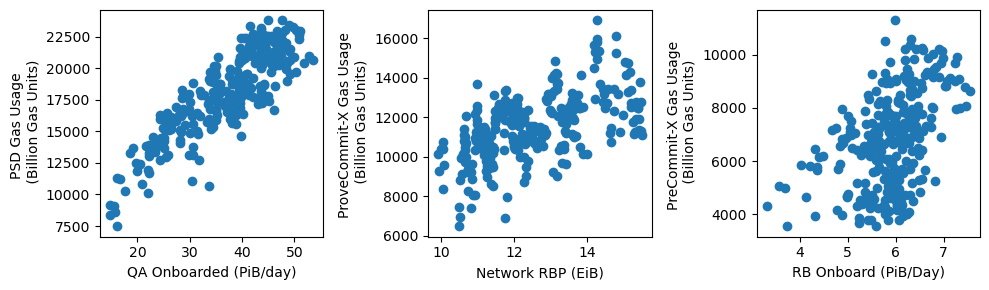

In [14]:
# dff = gas_train_psd_df
dff = merged_df_basefee_burn

provecommitx = dff[['provecommit_sector_gas_used', 'provecommit_aggregate_gas_used']].sum(axis=1)
precommitx = dff[['precommit_sector_gas_used', 'precommit_sector_batch_gas_used']].sum(axis=1)

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(dff['day_onboarded_deal_power'], dff['publish_storage_deals_gas_used']/1e9)
plt.xlabel('QA Onboarded (PiB/day)')
plt.ylabel('PSD Gas Usage \n (Billion Gas Units)')

plt.subplot(1,3,2)
plt.scatter(dff['total_raw_power_eib'], provecommitx/1e9)
plt.xlabel('Network RBP (EiB)')
plt.ylabel('ProveCommit-X Gas Usage \n (Billion Gas Units)')

plt.subplot(1,3,3)
plt.scatter(dff['day_onboarded_rb_power_pib'], precommitx/1e9)
plt.xlabel('RB Onboard (PiB/Day)')
plt.ylabel('PreCommit-X Gas Usage \n (Billion Gas Units)')

plt.tight_layout()

In [15]:
# power=2 corresponds to Gamma, power=3 is InverseGaussian
psd_model = TweedieRegressor(power=2, alpha=0.1, link='log')
X = dff[['day_onboarded_deal_power']]
y = dff['publish_storage_deals_gas_used']/1e9
psd_model.fit(X,y)
print('PSD', psd_model.score(X,y))

# TODO: reduce the features
provecommitx_model = TweedieRegressor(power=2, alpha=0.1, link='log')
# X = gas_train_psd_df[['day_onboarded_rb_power_pib',
#        'day_onboarded_qa_power_pib', 'total_raw_power_eib',
#        'total_qa_power_eib', 'rb_renewal_rate', 'day_renewed_qa_power_pib',
#        'day_renewed_rb_power_pib', 'fpr', 'day_onboarded_deal_power',
#        'network_qa_rb_ratio']]

# Even though the other features help the classifier, proving messages should soley be 
# a function of the # of sectors on the network.  The classifier is pretty poor,
# but it may be OK if we do a probabilistic version of a GLM
X = dff[[
    'total_raw_power_eib',
    # 'total_qa_power_eib', 
]]
y = dff[['provecommit_sector_gas_used', 'provecommit_aggregate_gas_used']].sum(axis=1) / 1e9
provecommitx_model.fit(X,y)
print('ProveCommitX', provecommitx_model.score(X,y))

PSD 0.7275712775105936
ProveCommitX 0.3240073500569627


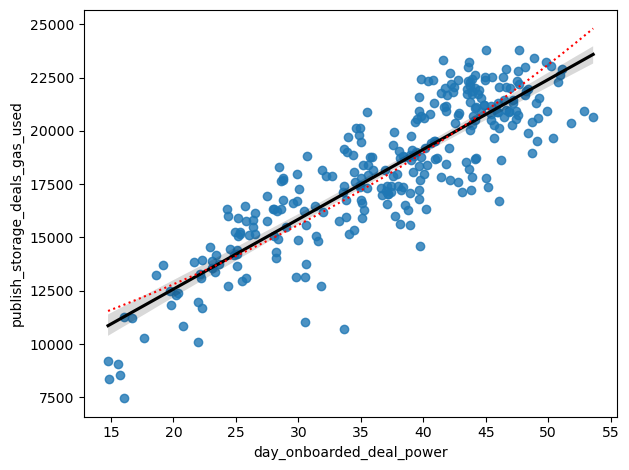

In [24]:
ddo_psd_reduction = 0.85
ddo_provecommitx_reduction = 0.2

# plot only the first feature to keep plot 2d
# plt.figure(figsize=(8,4))

X = dff[['day_onboarded_deal_power']]
y = dff['publish_storage_deals_gas_used']/1e9
# plt.subplot(1,2,1)
sns.regplot(x=X, 
            y=y, 
            line_kws={'color': 'k'})
# plot the learned regression
X0 = pd.DataFrame()
X0['day_onboarded_deal_power'] = np.linspace(min(dff['day_onboarded_deal_power']), 
                                             max(dff['day_onboarded_deal_power']), 
                                             100)
y_pred = psd_model.predict(X0)
plt.plot(X0['day_onboarded_deal_power'], y_pred, color='r', linestyle=':', label='GammaRegression')

# plt.subplot(1,2,2)
# sns.regplot(x=X, y=y, line_kws={'color': 'k'})
# X0 = pd.DataFrame()
# X0['day_onboarded_deal_power'] = np.linspace(0, 400, 100)
# y_pred = psd_model.predict(X0)
# plt.plot(X0['day_onboarded_deal_power'], y_pred, color='r', linestyle=':', label='Status-Quo')
# plt.plot(X0['day_onboarded_deal_power'], y_pred*(1-ddo_psd_reduction), color='g', linestyle=':', label='DDO')
# # plt.axhline(50000, color='grey', linestyle='--', label='Target')
# plt.ylim(0, 75000)
# plt.ylabel("")
# plt.legend()

# #### ProveCommitX
# X = dff[['total_raw_power_eib']]
# y = dff[['provecommit_sector_gas_used', 'provecommit_aggregate_gas_used']].sum(axis=1) / 1e9
# plt.subplot(2,2,3)
# sns.regplot(x=X, 
#             y=y, 
#             line_kws={'color': 'k'})
# # plot the learned regression
# X0 = pd.DataFrame()
# X0['total_raw_power_eib'] = np.linspace(min(gas_train_psd_df['total_raw_power_eib']), 
#                                         max(gas_train_psd_df['total_raw_power_eib']), 
#                                              100)
# y_pred = provecommitx_model.predict(X0)
# plt.plot(X0['total_raw_power_eib'], y_pred, color='r', linestyle=':', label='Status-Quo')
# plt.ylabel('ProveCommitX GasUsed')
# plt.subplot(2,2,4)
# sns.regplot(x=X, y=y, line_kws={'color': 'k'})
# X0 = pd.DataFrame()
# X0['total_raw_power_eib'] = np.linspace(1, 50, 100)
# y_pred = provecommitx_model.predict(X0)
# plt.plot(X0['total_raw_power_eib'], y_pred, color='r', linestyle=':', label='Status-Quo')
# plt.plot(X0['total_raw_power_eib'], y_pred*(1-ddo_provecommitx_reduction), color='g', linestyle=':', label='DDO')
# plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'glm_case2_historical.png'))

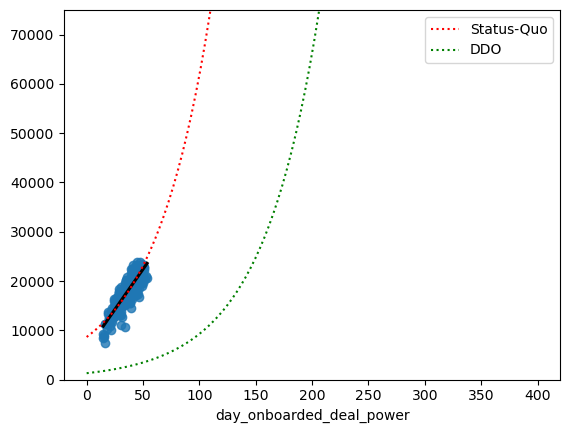

In [25]:
sns.regplot(x=X, y=y, line_kws={'color': 'k'})
X0 = pd.DataFrame()
X0['day_onboarded_deal_power'] = np.linspace(0, 400, 100)
y_pred = psd_model.predict(X0)
plt.plot(X0['day_onboarded_deal_power'], y_pred, color='r', linestyle=':', label='Status-Quo')
plt.plot(X0['day_onboarded_deal_power'], y_pred*(1-ddo_psd_reduction), color='g', linestyle=':', label='DDO')
# plt.axhline(50000, color='grey', linestyle='--', label='Target')
plt.ylim(0, 75000)
plt.ylabel("")
plt.legend()
plt.savefig(os.path.join(save_dir, 'glm_case2_extrapolate.png'))

PSD Inverse 0.734352751530264


<Axes: xlabel='publish_storage_deals_gas_used', ylabel='day_onboarded_deal_power'>

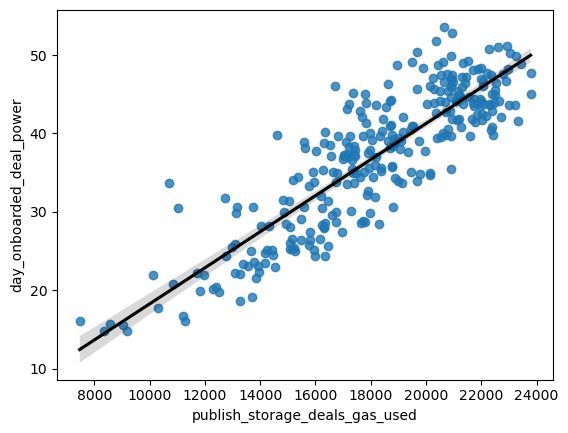

In [18]:
psd_inverse_model = TweedieRegressor(power=2, alpha=0.1, link='log')
X = dff[['publish_storage_deals_gas_used']]/1e9
y = dff['day_onboarded_deal_power']
psd_inverse_model.fit(X,y)
print('PSD Inverse', psd_inverse_model.score(X,y))

sns.regplot(x=X, 
            y=y, 
            line_kws={'color': 'k'})

In [19]:
predicted_gas_usage = psd_model.predict(pd.DataFrame([{'day_onboarded_deal_power': 20}]))[0]
print(predicted_gas_usage)

12805.905024464486


In [20]:
psd_inverse_model.predict(pd.DataFrame([{'publish_storage_deals_gas_used': predicted_gas_usage}]))[0]

24.803842038740598